<a href="https://colab.research.google.com/github/Boon-Yang/Machine-Learning-for-Defect-Detection-In-Additive-Manufacturing/blob/master/One_Class_Learning(I).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

import scipy.io as io
import os 
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import h5py

# Progress bar
from tqdm import tqdm

# Features Extraction
from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon
from skimage.measure import regionprops, label
from statistics import mean

os.chdir('/content/drive/My Drive/FYP MAT Data')

Mounted at /content/drive


# Import Features

In [10]:
features_df = pd.read_csv('/content/drive/My Drive/FYP MAT Data/Build1_Features.csv')
features_df.head()

,blockNo,ImageId,spatterNum,spatterArea,spatterEccenticity,blobArea,blobEccentricity
0,1,0,0,0,0.0,0,0.0
1,1,1,0,0,0.0,0,0.0
2,1,2,0,0,0.0,0,0.0
3,1,3,0,0,0.0,0,0.0
4,1,4,0,0,0.0,0,0.0


blobArea


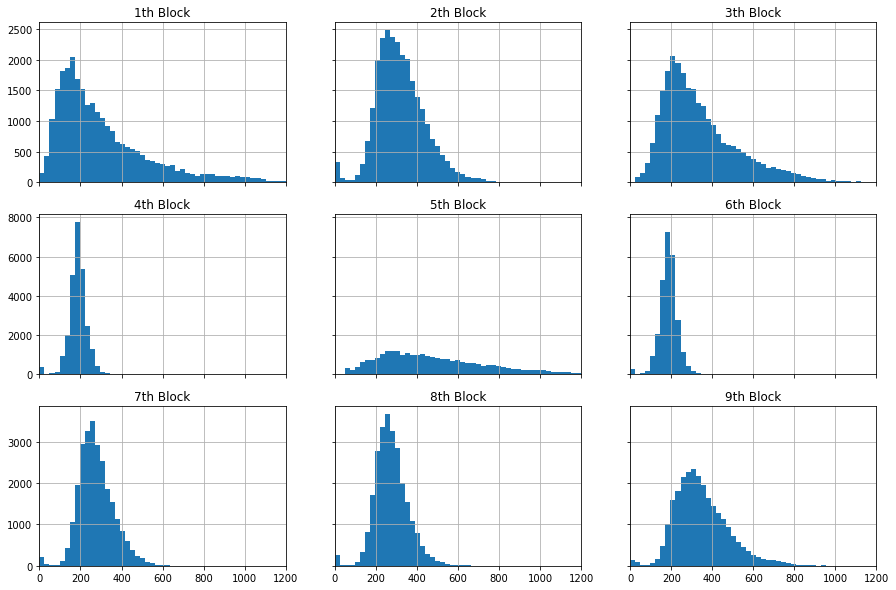

In [11]:
feature = 'blobArea'

fig, axs =  plt.subplots(3, 3, figsize=(15, 10) , sharex='col', sharey='row')
axs = axs.flatten()

for ix, ax in enumerate(axs):
  ax.hist(features_df.query("blockNo == {}".format(ix+1))[feature], bins=np.linspace(0, 1200, 50))
  ax.set_xlim(0, 1200)
  ax.set_title(str(ix+1) + 'th Block')
  ax.grid()
print(feature)

spatterArea


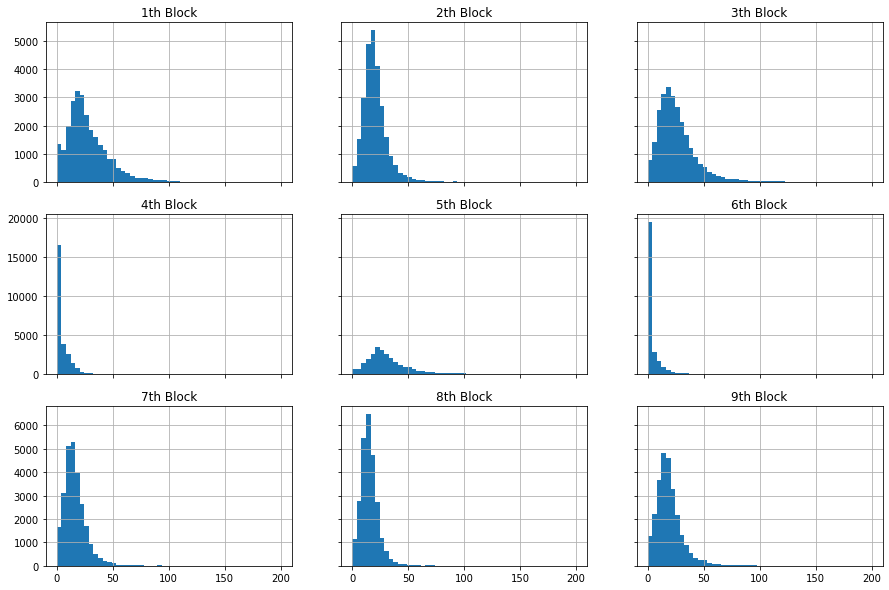

In [12]:
feature = 'spatterArea'

fig, axs =  plt.subplots(3, 3, figsize=(15, 10) , sharex='col', sharey='row')
axs = axs.flatten()

for ix, ax in enumerate(axs):
  ax.hist(features_df.query("blockNo == {}".format(ix+1))[feature], bins=np.linspace(0, 200, 50))
  ax.set_title(str(ix+1) + 'th Block')
  ax.grid()
print(feature)

4th and 6th blocks have more consistent blob sizes and lots of zero spatter properties.